# 5PAHPPSY: Big Data Analytics in Python: Session 4

___

_Jodie Lord<br/>
Department of Basic and Clinical Neuroscience<br/>
Institute of Psychiatry, Psychology and Neuroscience<br/>
King's College London<br/>
jodie.lord@kcl.ac.uk_
___

## (Last Set of 😢) Learning Objectives:
<br/>

1. Grasp the basic concept of machine learning. 


2. Learn some (basic) machine learning techniques 🎰


3. Consolidate what we've learnt over the last 4 weeks.

<br/>

**Last 15 mins:**

Overview of assessment structure and expectations 📝
___

### ✋ BUT FIRST - ITS TIME TO RECAP AGAIN

## <font color=green>⌨ Recap Exercises </font>

**R1: Data Analytics 📈**

In [ ]:
## Load the cog_clin_data.csv file (this is the merged dataset we created last week, saved as a .csv file) - name df
## View the head of the file onto the screen
## Hint: Remember your libraries!



In [ ]:
## Check skewness and kurtosis of MRI_counts in the data 
## Assume skew ±0.5 = moderate and ±0.7 high
## Assume kurtosis ±4.0 = high
## Hint: Remember your libraries:

#Load stats library


#Check skewness for MRI_counts:


#Check kurtosis for MRI_counts:


In [ ]:
## Run a shapiro-wilks test on the same variable - what does this show? 



**R2: Charting  📊🐬**

In [ ]:
## Load in your charting libraries

# Import matplotlib and assigning to name "plt"


# Import seaborn and assigning to name "sns"


"""You'll need to also perform an additional step to ensure you can see your charts - 
can you remember what this is?"""



In [ ]:
## Use the seaborn library to plot a histogram of the MRI_Count data 
## Is the visualisation in agreement with what our stats tell us?

#Plot histogram


In [ ]:
## Use scatter plot functionality within seaborn to look at the relationship between MRI_count and CogTest2
## Plot a regression line through the plot - is there evidence of a relationship between these two variables?

#Plot correlation using the lmplot function so that a regression line can be fit to the data:


In [ ]:
## Save your figure as a jpeg file within your current working directory
## Hint: Remember to assign the chart as an object first:
## DOUBLE CHECK YOUR FOLDER ON YOUR DESKTOP ONCE DONE - IS IT THERE????

#Assign chart as object:


#Save the figure:


In [ ]:
## Run a pearsons correlation using the stats package to confirm whether the stats agree with what we see here:
## What is the r?
## What is the p-val? - is there evidence of a significant relationship?



In [ ]:
## Visualise this, along with the correlation coefficient with height and weight using pandas 
## Overlay with a heatmap

#Create correlation matrix using pandas:
#Add heatmap:


______________________

## (1) Introduction to Machine Learning 🎰

### What is machine learning?...

- Machine learning is a broad concept which refers to specialised algorithms designed to take in a (typically very large) set of variables, and use information contained within those variables to make predictions about future events.
- As the name suggests, the algorithms "learn" from the data, and update their information accordingly.

**The basic ideas is:**
1. Receive a collection of observations / variables associated with an outcome of interest.

2. Train a “Machine Learning” model using this data.

3. Predict events on a new set of data relating to the same outcome of interest, using the trained algorithm.

- 🔍 For those interested in learning more, [this article](https://www.nature.com/articles/nmeth.4642) provides a good overview of the differences between classic statistics and machine learning.

**Different types of machine larning exist:**
- Supervised            (_*the focus of today*_)
- Unsupervised
- Reinforcement Learning

**Different types of outcomes include:**
- Binary               (_*the focus of today*_)
- Continous

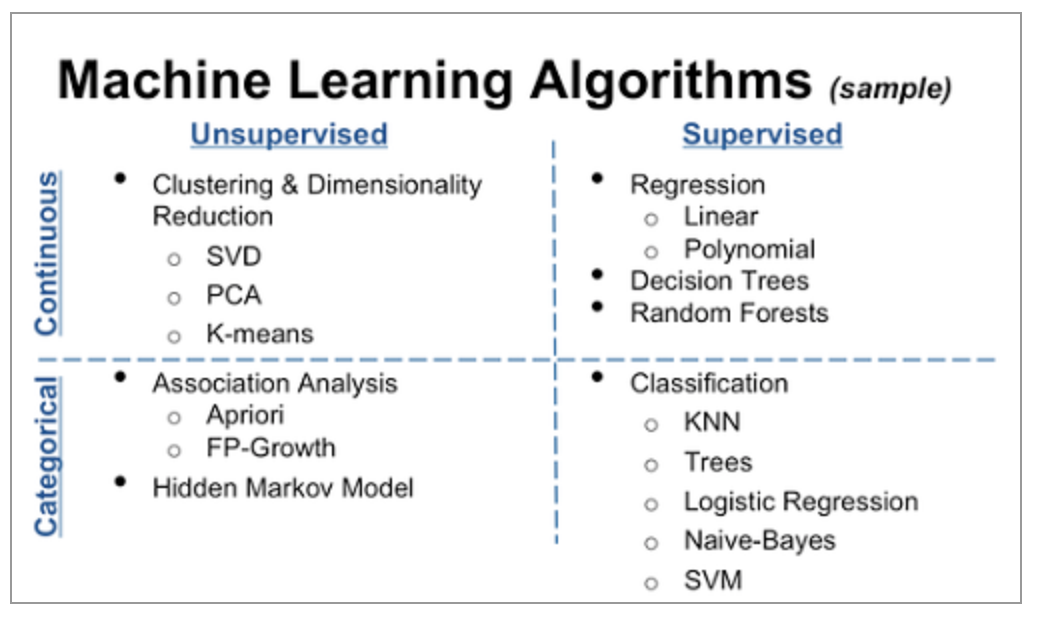

In [2]:
Image('images/supervised_unsupervised.png')

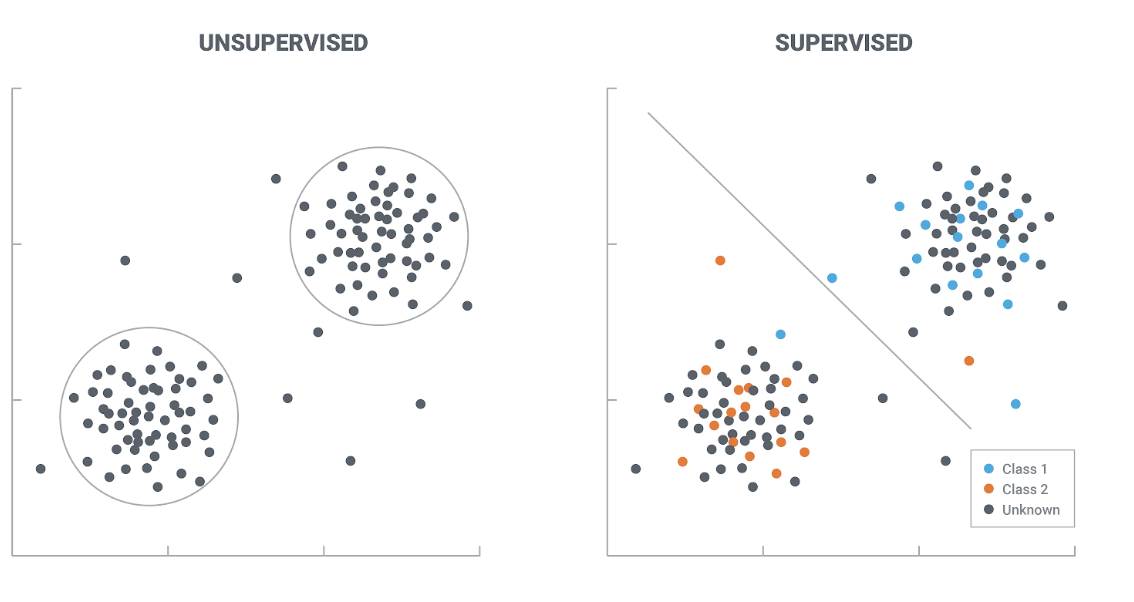

In [3]:
Image('images/supervised_sunsupervised_2.png')

_____________
## <font color=Red>  🚢 Would YOU survive the titanic?! </font>

### **Last session - Let's have some fun with this!** 🕺


- Here we'll use an applied (simulated) example in which we'll use variables representing charactoristics of individuals onboard the titanic when it sank to predict whether or not - in a new situation where a ship were sinking - individuals with certain charactoristics would be likely to survive.

**THE BACKGROUND**
- The 1912, the infamous Titanic ship, travelling on it's way to America, collided with an iceberg.
- The ship began to sank and because there weren't enough lifeboats onbaord to cater for everyone, many passengers and crew did not get out alive.
- If you've seen the film (❤️️) you'll know that individuals with certain charactoristics were were more likely to recieve entry to a lifeboat than others - making them more likely to survive the sinking ship.

**THE CHALLENGE**
- Can we use information about those who did or did not survive to predict who would be more likely to survive the sinking ship?...


- To do this we'll need to know:
    - What data we have available 
    - What the most important "features" are which may predict our outcome (i.e. which charactoristics are most predictive of our outcome)?

## <font color=green>⌨ Task </font>

- Load in the `titanic.xls` file into your working session and assign it the name `titanic`.
- View the head of the file.
- Confirm how many rows and columns we have
- What are the datatypes of the variables?
- Any missing values?
- How many passengers survived? How many died?

In [ ]:
## Load in the titanic dataset
titanic=pd.read_excel("titanic.xls")

## View the head of the file


In [ ]:
## Confirm total rows and columns


In [ ]:
## Confirm what kind of datatypes we have in our file



In [ ]:
## Confirm whether we have any missing values in our data



In [ ]:
## Check how many passengers survived by running the below code:
titanic['survived'].value_counts() 

__________________

_N.B. Columns within the titanic data are:_

- survived - did the passenger survive (0 = No; 1 = Yes)
- pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- fare - Passenger Fare

### <font color=Midnightblue> **Important things when working with machine learning models:** </font>
- Free-text is not interpretable by ML models - must include numeric data types only!
- Missing data causes problems / biases. Must be either imputed or removed.
- Columns are interpreted as "features", rows are interpreted as "observations".

## <font color=green>💬 Discussion </font>

- Based on what we know about our data - which variables could cause us problems here? 🤔
- How should we deal with these (if at all)?

____________
### (1a) Preparing your data 🛠

Data preperation is an **extremely** important step in ensuring your machine learning models run well. We therefore need to deal with our missing data and our non-numeric variables. 

For today we will:
- Impute our single missing fare value using information from our pclass feature.
- Drop our missing age observations.
- Recode our sex strings into numeric form.
- Drop our name feature.

## <font color=green>💬 Discussion </font>

- Take a look at the decisions we've made above - why do you think each of these decisions have been made?

**1. Imputing fare using pclass**

In [ ]:
## First: confirm the pclass for the missing fare observation:
## Hint: Make note of the row index for this observation also - we will use it later!

titanic.loc[titanic['fare'].isna()] 

In [ ]:
## Second: Confirm the mean fare paid by each class of passengers 
## What was the mean fare paid by 3rd class passengers?

titanic.groupby('pclass')['fare'].mean()


In [ ]:
"""Third: Define a function which imputes using the mean values of the fare column, by the categories within
the pclass column (i.e. this lets us impute mean fair by passenger class).
To do this, we need to define a few steps, as outlined below...

WARNING: We haven't covered user defined functions within our sessions so the below may look a little scary/confusing!
DON'T PANIC - just know that this ability exists. Knowing what to change to get the information you need is all you
need at this point"""

"""YOU ARE NOT EXPECTED TO KNOW USER DEFINED FUNCTIONS FOR THE EXAM - IT IS JUST A 'NICE TO HAVE'"""

# 1. Create a groupby object: by_pclass
by_pclass = titanic.groupby(['pclass'])  #This creates a new datatable which groups observations by passenger class
                                         #If you wanted to impute the mean of a value based on e.g. sex (instead of pclass), you would just change this to .groupby(['sex'])
                                         #If you wanted to impite the mean based on e.g. sex AND pclass, you would just change this to .groupby(['pclass', 'sex'])

        
# 2. Write a function that imputes mean
def fillmissing_mean(series):
    return series.fillna(series.mean())  #This is a user defined function. No computation is happening here - we are just defining the instructions for, and naming the function (naming it: fillmissing_mean)
                                         #This essentially says: when this function is used (as in step 3), for the series of values specified, fill na values using the series mean. 
                                         #If you wanted to change this so it filled missing values by e.g. the median you would simply change series.mean() to series.median() (and you'd probably want to change the name of the function from fillmissing_mean to fillmissing_median - to make it clear what the function is doing!)

        
# 3. Impute age and assign to titanic.age
titanic['fare'] = by_pclass['fare'].transform(fillmissing_mean)    #This is essentially saying:
                                                                   #For my 'fare' column within my titanic datatable
                                                                   #Impute ("fill in") missing values on the basis of which passenger class that observation belongs to
                                                                   #Python knows we want to fill nas using the mean, becuase we have passed through out fillmissing_mean function which we defined in the step before.
            

_________

🔍 *A nice datacamp tutorial on filling data using aggregates etc can be found [here](https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/grouping-data?ex=1)*

🔍 *__For the keen__: [here](https://www.w3schools.com/python/python_functions.asp) and [here](https://www.learnpython.org/en/Functions) offer easily digestible introductions to user define functions (entirely optional but extremely useful).*

___________

In [ ]:
# Fourth: Confirm there are no missing longer any missing fare values in your data:


In [ ]:
"""Fifth: Confirm the value for the missing datapoint has changed to the mean fare value based on 
3rd class passengers by filtering out the row index for this missing value"""

""" Hint: We filtered our table by the fare.isna() above, so you can use this to identify what the row index is for 
this missing value.(look at the first, unnamed column - this is your row index!)"""



**2. Dropping missing age observations**

In [ ]:
## Use the .dropna() function to remove all missing age observations from your data
titanic=titanic.dropna()


## Pssst ##
## In this case, age is our only remaining feature with missing values, so dropna() across the entire data table is fine.
## If had multiple features with missing data and only wanted to drop nas for age, we could use the subset= option within dropna function:

#titanic=titanic.dropna(subset=['age'])

In [ ]:
## Check your data still looks sensible:


In [ ]:
## Confirm you no longer have any missing values in your datatable:


**3. Removing uneccessary / problematic features**

In [ ]:
## Use the .drop() function to remove our uneccesarry name feature from the data:
titanic = titanic.drop(['name'], axis=1)

**Psssst 👀**
- axis=1 is simply telling python that what we want to drop is a column variable.
- axis=1: telling python to look across columns
- axis=2: telling python to look across rows
- Some functions require you to explicity state which axis you are referring to. So if python throws an error relating to an "axis", you likely need to add in this to your argument!

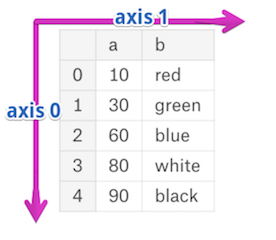

In [4]:
Image('images/axis.png')

In [ ]:
# Check your data - have the names been appropriately removed?


**4. Transforming strings to numeric**

In [ ]:
## Re-assign strings within the sex feature to numeric values:

# This can be achieved most easily using the .map() function
# We can then use a dictionary to map male and female keys to value pairs which we will use inplace of the keys:

titanic['sex'] = titanic['sex'].map({'male': 1, 'female': 0})

_____________
🔍 _For more information on the .map() function, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)_
_____________

In [ ]:
#Check your data - has the data updated appropriately?:



**5. Prepare feature and response variables**
- As a final data preparation step, we need to comfirm what our **feature** varaibles are and what our **response** variable is.
    + Features = the things (columns) we want to use to predict our outcome (i.e. age, gender, class, fare...)
    + Response = the outcome we want to predict (i.e. survival or not)
    
- To do this, we need to seperate out our data into and `X` and `y` datatable, where:
    + `X` contains our feature variables
    + `y` contains out response variable

In [ ]:
# Create a dataframe containing all feature variables you are interested in using as predictors within your model

X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]

In [ ]:
# Check your features - all okay - contain everything you expect?


In [ ]:
# Create y variable containing your outcome of interest:
y = titanic['survived']


In [ ]:
# Check your newly created y variable - all okay - contain everything you expect?


_____________
### (1a) Applying Machine Learning Algorithms 🎰

- Now that we have suitably prepared our data, we are ready to do some machine learning!


- As mentioned at the start, there are **many machine learning algorithms** to choose from, each with differing approaches to fitting feature data to response variables. 
- You need to explictly tell python which algorithm you wish to apply to your data - and depending on which algorithm you use, you may get very different results!
- Machine learning can get **complicated** quickly. We will merely touch the surface here to introduce you to the general idea, but do explore wider possibilites - there's some **super cool** stuff out there!

___________________
### Machine Learning using Random Forest 🌲

- Random Forest is one available machine learning algorithm which makes use of **decision trees** to classify outcomes on the basis of features.


- This is a **supervised** machine learning technique - we **give the algorithm information about our outcome** (survived / not), and features associated with this outcome, and the algorithm will decide, based on the strength of relationship between these things, how best to seperate the data and classify future cases.


- It is a method which can be used for both continous or categorical variables - here we will use it for categorical.


- **Very briefly** the techniques works by:
    + Splitting the data into two or more sub-populations, based on particular features within the data.
    + Identifying the "most important" splitter (i.e. a feature which, when split, best seperates the sample into homogenous groups of those with the outcome and those without) - prioritising this, and then splitting again, again considering all features to best split the next level.
    + Doing this many many many many many times across many different trees (each using a random selection of your sample) and finding the most predictive set of "classifiers" (features) which best predict the outcome of interest in a top down fashion.
    
    + This will create a "forest" of decision trees - each with slightly different approaches to splitting the data (as they each use a slightly different random selection of the overall sample). --> This means different trees may predict different outcomes based on the same set of features passed through the model. To then reach an overall prediction across _all_ the trees, a "majority vote" approah is taken. For example, if the total-tree-n=3, and 1 tree predicts "died" and the other 2 predict "survived" for the same observation, the model will classify that observation as "survived".
    + Using the trained "forest" of trees, you can then pass through new observations containing the features that the algorithm has been trained on and the algoirthm can predict an outcome for these new observations.
    

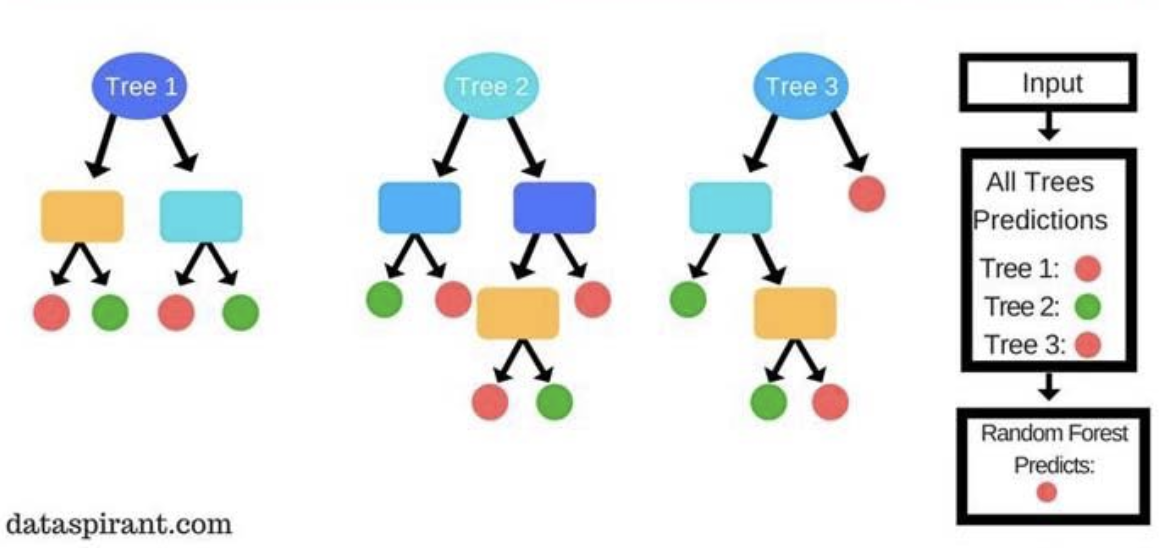

In [2]:
Image('images/random_forest.png')

________
🔍More information on Random Forest can be found [here](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)
_______


### <font color=midnightblue> 💻 4 key workflow steps for ML in python: </font>

**1. Import**

- Import the machine learning model you wish to use from an appropriate python library.

**2. Instantiate**

- Initiate the model and save it as an object

**3. Fit**

- Fit the X features to your y variable using your machine learning model.

**4. Predict**

- Pass through certain features to your fitted model and see whether the model would predict an individual with those features to survive the titanic!

In [ ]:
#1. Import you model - in this case we are using RandomForestClassifier, available within the sklearn package:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#2. Instantiate the model and assign it to object "random_forest"
random_forest = RandomForestClassifier(random_state=0)  #Random state=0 is just an option which allows us to get out consistent results each time we run our model

In [ ]:
#3. Fit the data within your model using the .fit() function:
random_forest.fit(X, y);       #If you remove the ; - the output will tell you the default options passed within the model

In [ ]:
#...3b: We can check how well our model fit our data using the .score() function as below.
## Run the command - what do you think the output is telling us here?
random_forest.score(X, y)

- To **predict**, let's relook at our feature variables:

In [ ]:
X.head()

- Here we have 6 feature variables included in our model.
- Now that we have fit our model using information from these variables, we can pass through "new" values for each of these features into our trained model, which would represent a new observation (which we did not use to train our model), to see whether this "new observation" (i.e. representing a new hypothetical passenger) would survive the sinking titanic!
- To do this, you pass through a list, containing (in this case) 6 values, which represent each of your feature variables.
**For example:** If I wanted to predict the outcome for: a first class, male passenger, aged 32, with no siblings or children onboard who payed a fee of £151, I would pass through the following list of numbers:

`[1,0,32.0,0,0,151]`

**Where:**
- 1st class passenger= `pclass=1`
- Male = `sex=1`
- 32 years old= `age=32`
- 0 siblings= `sibsp=0`
- 0 children= `parch=0`
- a fee of 151= `fare=151`


_Notice how the values passed through in the list must match the order in which variables are specified within the columns_

In [ ]:
## Demonstrating this in practice:
random_forest.predict([[1,1,32.0,0,0,151]])

## <font color=green>💬 Discussion </font>

* what do you think the value returned here means? 🤔

________

**Predictive probabilities**
- Rather than returning a binary "survived"/"did not survive" outcome, you can also return predictive probabilties using the `.predict_proba()` function.
- This tells you, based on the trained model, the probability of dying verses the probability of surviving, given the features you pass into your model:

In [ ]:
## Demonstrating this in practice:
random_forest.predict_proba([[1,1,32.0,0,0,151]])

## <font color=green>💬 Discussion 1</font>

* What inferences can we make based on this output? 

## <font color=green>💬 Discussion 2</font>

* Which output do you think is more useful - `.predict()` or `.predict_proba()`? 🤔
* Why?

_________
**Feature Importance**

- Random forest splits data on the basis of features it thinks are the most important in determining the outcome of interest.
- Some features will be treated with higher importance than others - that is, they have more "predictive power" in determining the outcome.
- After training your model, you can run the `.feature_importances_` command to confirm which features have been assigned higher predictive importance in the trained model than others:

In [ ]:
## Running feature_importances_ command
random_forest.feature_importances_

- The standard output is a little hard to interpret though - especially when you have MANY features. A list of numbers are returned which correspond to the column features passed through the model, but you don't want to hunt through with the naked eye to try and figure out which are more important than others. This is labour intensive and prone to error 😩


- Instead, we can use pandas 🐼, to pass the information into a dataframe, and then sort the values using a `.sort_values()` function to return our features in order of predictive importance 🙌 

In [ ]:
# The code below allows you to sort your X feature variables in order of importance:

importances = pd.DataFrame({'feature':X.columns,
                            'importance': random_forest.feature_importances_})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

## <font color=green>💬 Discussion </font>

* Which feature(s) did the model assign higher predictive importance?
* What do you think this means in terms of predicting outcomes for new cases?

_________
* You can also use data visualisation to help visualise the relative importance of features within the model also.

* Again, particularly useful if you have a particularly large set of features (which is common in real world machine learning scenarios), and you just want to eyeball the data:

In [ ]:
importances.plot.bar()

_______
🔍see other options for plotting feature importance [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
_________

## <font color=green>⌨ Task </font>
- Create a new set of X feature variables, this time only containing the following features:
    + sex
    + age
    + sibsp
    
    
- Train your random forest model on these new, reduced set of feature variables.


- Use information about yourself (i.e. your own sex, your age, and how many siblings you have) to predict whether you would survive the sinking titanic?!

    - _Imagine that if you have siblings (in real life that is...), that you take all of these siblings onto the titanic with you._

___________________
### Machine Learning using K-Nearest Neighbours 👥

- An alternative algorithm to Random Forest is the k-nearest-neighbors (KNN) algorithm.


- KNN, like Random Forest, is a **supervised** machine learning method.


- **(Again, VERY briefly)**, KNN works on the assumption that similar things exist in close proximity. In other words, similar things are near to each other in multidimensional space.


- In other words, if I have charactoristics similar (or "closer") to someone with a particular outcome, then I too am more likely to possess that outcome.


- If we have a new observation, we can therefore use information from a trained model to label our new observation based on how its "nearest neighbours" (most similar observations) in the trained data are labelled.


- We can set 'k' to any number, and the algorithm will check the 'k' nearest neighbours to our new observation to classify it. 


- Similarly to random forest, the final classification is made using a "majority vote" approach. For example, if we set 'k' to 10, the algorithm would check the 10 nearest neighbours to our new observation and if a higher number of those neighbours were e.g. "survive", our new observation would too be classified as "survive", whereas if a higher number of those 10 neighbours were e.g. "not survive", then our new observation would too be classified as "not survive".


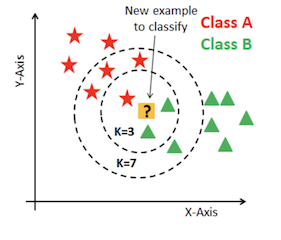

In [6]:
Image('images/knn.png')

__________
🔍 More information on KNN can be found [here](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) and [here](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

________
#### <font color=midnightblue> 💻 ALWAYS REMEMBER THE 4 KEY WORKFLOW STEPS FOR ML IN PYTHON: </font>

1. Import

2. Instantiate

3. Fit

4. Predict

Let's give KNN a go below using the feature and response variables already generated 👇

In [ ]:
#1. Import:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#2. Initiate: 
knn = KNeighborsClassifier()

In [ ]:
#3. Fit
knn.fit(X, y);

In [ ]:
#3b. Assess how well the model has fit the data - how does this compare to how well random forest fit the data? 
knn.score(X, y)

In [ ]:
#4. Predict - do we get the same prediction for the same new observation as we did for random forest?

knn.predict([[1,1,32.0,0,0,151]])

In [ ]:
#4b. Look at the predictive probability - how does this compare to the predictive probability of random forest?
knn.predict_proba([[1,1,32.0,0,0,151]])

_**NOTE:** Unlike random forest - KNN Algorithm does **not** provide any prediction for feature importance_

## <font color=green>💬 Discussion </font>

* Based on the results from RF and KNN for our same new observation - which model do we think did a better job (if any) at predicting our outcome based on our feature variables?

____________
## 📽 Closing Credits

### Overview of what's been covered 
We have covered **A LOT** of ground in the last 4 weeks! 😰

Some of the key things we've explored have been:
- Object assignment
- Basic arithmetic 
- Core data types (integers, lists, dictionaries etc)
- Slicing
- Loops
- Libraries 🐼🐬📊📈🎰
- Pandas
- Data mining
- Data merging
- Basic statistics
- Charting
- Basic machine learning

Make sure you are familiar with each of these areas for the assignment!

________
## The assignment 📝

- Will be **released the last week of March**, after the second rotation **(due 10:30 on Tuesday 14th April)**.


- **Open book**: Use google! Use the documentation! Use your notes! Get in the habit of using the help around you!


- You will be provided with a simulated dataset(s) as part of the assignment. Expect missing data, various datatypes, and ambiguity - much like you would expect in a real research setting. Be prepared to be able to use the techniques we have learnt to deal with and make sense of this data in order to make some sensible inferences using statistics, charts and models.


- Work is expected to be submitted in the form of a Jupyter Notebook. Make sure you're familiar with creating new notebooks, adding codechunks etc and accessing the document from your local folder space.


* Marking is equally weighted across 4 core areas:
    + **Code quality and comprehension** - CLEAR code which is easy to interpret. Errors should not appear in your output.  
 
    + **Understanding and execution of charting components** - This includes application with core statistics covered within the course. 
    
    + **Understanding and execution of basic machine learning** - You will be expected to show knowledge of at least _2_ maching learning techniques.
    
    + **Code reasoning and interpretation of output** - Understanding what you have done is as important as knowing how to run the code.
 
 
 
- A marking rubric is available on KEATS which overviews expectations for each of these areas - familiarise yourselves with it!
    
    
### ✅ **For the best marks**
- Show that you have **engaged with the wider documentation** and libraries available online. Show us something that wasn't explicitly taught within the workshops (e.g. extra parameters within charting components, other machine learning algorithms available within python). Sticking to the taught content, if done well, will get you good marks, but showing us **more** will get you the best marks.


- Demonstrate that you have a **thorough understanding** of what you have done and why. What are the implications of the output? Why might what you have done be useful in a real world research setting?


- **Simplicity over complexity** - always try and reach your output using as few a steps as possible (this will make your life easier down the line if you continue to code also!).



### 💡 **Some extra tips** 

- Comments comments comments!! You will be awarded marks for commenting on your code chunks (#). It's an easy place to pick up extra marks!


- If you find your output is continually failing and you can't run a piece of code - keep the code produced in your code-chunk, but comment it out with a # so that it's not evaluated by python. That way, we can still look to assign marks based on your code and can provide feedback as to why the code may have errored (and you won't "lose" marks, so you have nothing to lose by keeping the code in!).


- Errors are most frequently due to:
    + Forgetting to load a required library
    + Forgetting to run an earlier code chunk which the current code chunk relies on
    + Forgetting to put a : in things like loops.
    + Forgetting to close off brackets
    + Forgetting that python is case sensitive
    + Missing a comma somewhere (this happens to me on a daily basis...)
    + Trying to call the wrong data type (remember how casting can help here)
    + Pointing to the wrong index (remember they start at 0)

👆👆👆👆**Make sure you check all of these before you give up on your code!**

<br>

- Make use of the forum. There are no stupid questions. If you are struggling with something, likely others are too, and it's likely that I haven't explained it well enough, so don't be afraid to ask!


- Remember: **GOOGLE IS YOUR BEST FREIEND!!**


<br>

<font color=blue> **I will post some extra learning / revision material in the weeks between now and the assignment. KEEP PRACTICING!** </font>




## ❗ **Finally:**


### **Have fun with it!!** 🎉 
This is your opportunity to really explore what python has to offer and to be creative with your code! Push the boundaries, make mistakes, and learn what works and what doesn't. The possibilites are limited only by how far you wish to take your code.

🙋